Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course. In this milestone, you need to prepare the data for modeling as well as build an initial model that you will need to refine for Milestone 4..

For Milestone 3 you should

- prepare the data via cleaning, normalization, encoding, et cetera; and
- generate and evaluate a working model (linear, or time series).

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models. (i.e. predict continuous var 'price' from other vars)

url: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Import libraries

from scipy.stats import norm
import numpy.random as nr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm


%matplotlib inline

In [2]:
# kc house sales dataset.. has no missing values

filename = 'kc_house_data.csv'
data1 = pd.read_csv(filename)

print(data1.shape)
data1.head(10)

(21613, 21)


id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   
5    101930     1.0           0     0     ...         11        3890   
6      6819     2.0           0     0     ...          7        1715   
7      9711     1.0           0     0     ...          7        1060   
8      7470     1.0           0     0     ...          7        1050   
9      6560     2.0           0     0     ...          7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   
5           1530      2001             0    98053  47.6561 -122.005   
6              0      1995             0    98003  47.3097 -122.327   
7              0      1963             0    98198  47.4095 -122.315   
8            730      1960             0    98146  47.5123 -122.337   
9              0      2003             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

In [3]:
# summary statistics to get a sense of distribution of column values

data1.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:

# regression model: predict price given  bedrooms, sqft_living, floors, yr_built
# ^one-hot encoding waterfront and condition (>2 or not) and view (>0 or not)

# can do large one-hot encoding of zipcode for improved model in MileStone 4 (location, location, location)


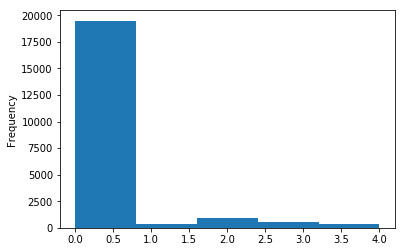

In [22]:
# visualize distribution of view

data1.loc[:,'view'].plot.hist(bins = 5)

In [20]:
# copy a new df with only columns of interest, one-hot encode, zscore all numeric columns

# copy to new dataframe
data2 = data1[['price','bedrooms','sqft_living','floors','yr_built','waterfront','condition','view']].copy()

# one hot encode waterfront, condition, view
data2['view_dummy'] = data2.view.apply(lambda x: 1 if x > 0 else 0)
data2['condit_dummy'] = data2.condition.apply(lambda x: 1 if x < 3 else 0)
del data2['view']
del data2['condition']
    
# z-score numeric columns
from scipy.stats import zscore
data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']] = data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']].apply(zscore)

# check new dataframe
data2.describe()

price      bedrooms   sqft_living        floors      yr_built  \
count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
mean   5.400881e+05 -1.254167e-15  3.174253e-16 -1.753125e-14  3.592925e-15   
std    3.671272e+05  1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00   
min    7.500000e+04 -3.624404e+00 -1.948891e+00 -9.154270e-01 -2.417383e+00   
25%    3.219500e+05 -3.987371e-01 -7.108948e-01 -9.154270e-01 -6.810785e-01   
50%    4.500000e+05 -3.987371e-01 -1.849914e-01  1.053939e-02  1.360059e-01   
75%    6.450000e+05  6.764851e-01  5.118578e-01  9.365058e-01  8.849999e-01   
max    7.700000e+06  3.185793e+01  1.247807e+01  3.714405e+00  1.497813e+00   

         waterfront    view_dummy  condit_dummy  
count  21613.000000  21613.000000  21613.000000  
mean       0.007542      0.098274      0.009346  
std        0.086517      0.297692      0.096225  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000

In [35]:
# linear regression with multiple independent = TV, radio, newspaper ad expenditures, dependent = sales revenue

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression

# First initialize the model.
mlr = linear_model.LinearRegression()

# Fit the model to the data
x_input = data2[['bedrooms','sqft_living','floors','yr_built','waterfront','view_dummy','condit_dummy']].values.reshape(-1,7)
y_output = data2['price'].values.reshape(-1, 1)

# separate data into 80% training, 20% testing
train_mark = np.random.rand(len(data2)) < 0.8

x_train = x_input[train_mark]
x_test = x_input[~train_mark]
y_train = y_output[train_mark]
y_test = y_output[~train_mark]

# train model by fitting with training data
mlr.fit(x_train,y_train)

# Get predictions based on x test data
y_pred = mlr.predict(x_test)

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept')
print(mlr.intercept_)
print('Coefficients: ')
print(mlr.coef_)


# model evaluation
rmse = mean_squared_error(y_test, y_pred)
print('RMSE')
print(rmse)

r2 = r2_score(y_test, y_pred)
n_samp = len(y_test)
k = 7  # number of features

r2_adj = r2 * (n_samp-1) / (n_samp-1-k)

print('R squared adjusted')
print(r2_adj)

Intercept
[522132.06810984]
Coefficients: 
[[-41222.53707081 273266.34055702  39406.19546569 -76902.68629923
  684510.1682623  132341.97552292 -64415.20758265]]
RMSE
63322123378.99543
R squared adjusted
0.5673465150488133


C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

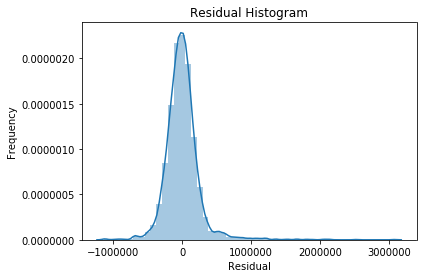

In [36]:
resids = y_test - y_pred

# Plot a histogram of the residuals
sns.distplot(resids, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [42]:
from matplotlib import pyplot

def plot_confid(data, lower_q, upper_q):

    ci1 = np.mean(data)-2*np.std(data)
    ci2 = np.mean(data)+2*np.std(data)
    
    interval = upper_q - lower_q
    pyplot.title('Distribution with %.3f confidence interval' % interval)
    #pyplot.plot(np.linspace(min(data),max(data),len(data)), data, color='blue')
    #data.plot.hist(bins = 30)
    breaks = np.linspace(data.min(), data.max(), num=40)
    pyplot.hist(data, bins=breaks)
    pyplot.xlabel('Price')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci1, color='red')
    pyplot.axvline(x=ci2, color='red')
    print('The %.3f confidence interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

The 0.950 confidence interval is 0.025 to 0.975
Standard deviation of residuals:
251631.36970659922


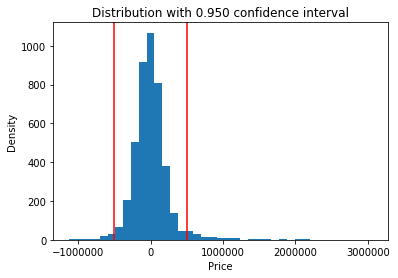

In [45]:
lower_q, upper_q = [.025, .975]
    
plot_confid(resids, lower_q, upper_q)

print('Standard deviation of residuals:')
print(np.std(resids))

### We see that the regression model using our 7 input features does not perform very well. The residuals are normally distributed but the 95% confidence intervals are +/- ~500k dollars. The standard deviation of the residuals is ~250k dollars which is a huge variance given that our mean King County home price is ~500k dollars. In order to improve this model, we will investigate which features are not informative and limiting the performance of our model.

Intercept, Slopes : 
Intercept       522638.452712
bedrooms        -44873.775366
sqft_living     277160.911134
floors           39440.044950
yr_built        -77245.097250
waterfront      637911.178558
view_dummy      134742.370365
condit_dummy    -64515.778384
dtype: float64
Intercept t-value, Slope t-values: 
Intercept       306.622831
bedrooms        -22.689630
sqft_living     125.703008
floors           20.832132
yr_built        -40.876307
waterfront       33.136213
view_dummy       22.992296
condit_dummy     -3.856068
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept        0.000000e+00
bedrooms        1.174700e-112
sqft_living      0.000000e+00
floors           1.920604e-95
yr_built         0.000000e+00
waterfront      6.659290e-235
view_dummy      1.357568e-115
condit_dummy     1.155594e-04
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 1715039897340201.2
SST: 2912916761921299.5
SSR: 1197876864581098.2
RMSE: 15652657.909122935
       

Text(0.5, 1.0, 'Residual Histogram')

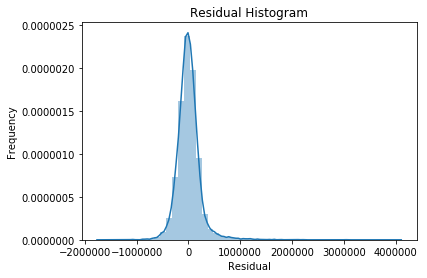

In [47]:
# We will compute a regression model for home price using our 7 specified features and then evaluate each feature

#'bedrooms','sqft_living','floors','yr_built','waterfront','view_dummy','condit_dummy'

ols_model = sm.ols(formula = 'price ~ bedrooms + sqft_living + floors + yr_built + waterfront + view_dummy + condit_dummy + 1', data=data2)

results = ols_model.fit()
n_points = data2.shape[0]
y_output = data2['price'].values.reshape(n_points, 1)

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Interestly, all of our 7 input features seem to be significantly informative, with only binarized property condition being borderline uninformative. However, I am convinced that a better model can be generated through further improvement and use of different approaches. This model will be revisited in Milestone 4, where we will use more techniques to improve the model for price prediction given property features. I suspect that there is a very informative feature that has not been included, and that is location information (potentially implimented through one-hot encoding of zipcode).